© Валерий Студенников, курс "Инструменты анализа данных"

# Задачи классификации. Метрики качества

Материалы:
* книжка Гвидо, Мюллер: «Введение в машинное обучение»
* [Открытый курс машинного обучения](https://habr.com/company/ods/blog/322534/)

Датасет с параметрами сортов ирисов
![iris-structure](https://docplayer.ru/docs-images/67/57767148/images/28-0.jpg)

In [53]:
import numpy as np
import pandas as pd
import sklearn, sklearn.model_selection, sklearn.neighbors, sklearn.svm

In [55]:
%pylab inline
#import matplotlib.pyplot as plt
import matplotlib.pylab as plt

Populating the interactive namespace from numpy and matplotlib


In [39]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

list( iris_dataset.keys() )

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [6]:
# Значение ключа DESCR – это краткое описание набора данных
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
# Значение ключа target_names – массив меток классов (в данном случае сорта цветов)
list( iris_dataset['target_names'] )

['setosa', 'versicolor', 'virginica']

In [8]:
# Список названий полей-признаков
list( iris_dataset['feature_names'] )

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# Сами признаки записаны в numpy-массиве data
type(iris_dataset['data']), iris_dataset['data'].shape

(numpy.ndarray, (150, 4))

In [10]:
# Первые пять строк массива data
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
# "Ответы" записаны в target
type(iris_dataset['target']), iris_dataset['target'].shape

(numpy.ndarray, (150,))

In [12]:
iris_dataset['target']
# Значения чисел задаются массивом target_names: 0 – setosa, 1 – versicolor, а 2 – virginica.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Метрики эффективности, обучающий и тестовый наборы

Прежде, чем мы применять ML-модель в реальной жизни, мы должны убедиться в том, что модель на самом деле работает и ее прогнозам можно доверять.

Разобьём весь датасет на две части. Одна часть данных используется для построения модели машинного обучения и называется обучающими *данными* (*training data*) или *обучающим набором* (*training set*). Остальные данные будут использованы для оценки качества модели, их называют *тестовыми данными* (*test data*), *тестовым набором* (*test set*) или *контрольным набором* (*hold-out set*).

![train-test-set](http://www.dataminingapps.com/wp-content/uploads/2015/12/1-289x300.png)

Обычно отбирают в обучающий набор 75% строк данных и оставшиеся 25% объявляются тестовым набором (либо 70% / 30%). 

В библиотеке `scikit-learn` есть функция `train_test_split`, которая перемешивает набор данных и разбивает его на две части.

В `sklearn` данные, как правило, обозначаются заглавной $ X $ (т.к. это двемерная матрица), тогда как метки обозначаются строчной $ у $ (т.к. это одномерный вектор).
Это навеяно стандартной математической формулой $ f(х)=у $.

In [15]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state = 0
)

In [16]:
print("форма массива X_train: {}".format(X_train.shape))
print("форма массива y_train: {}".format(y_train.shape))
print("форма массива X_test: {}".format(X_test.shape))
print("форма массива y_test: {}".format(y_test.shape))

форма массива X_train: (112, 4)
форма массива y_train: (112,)
форма массива X_test: (38, 4)
форма массива y_test: (38,)


Populating the interactive namespace from numpy and matplotlib


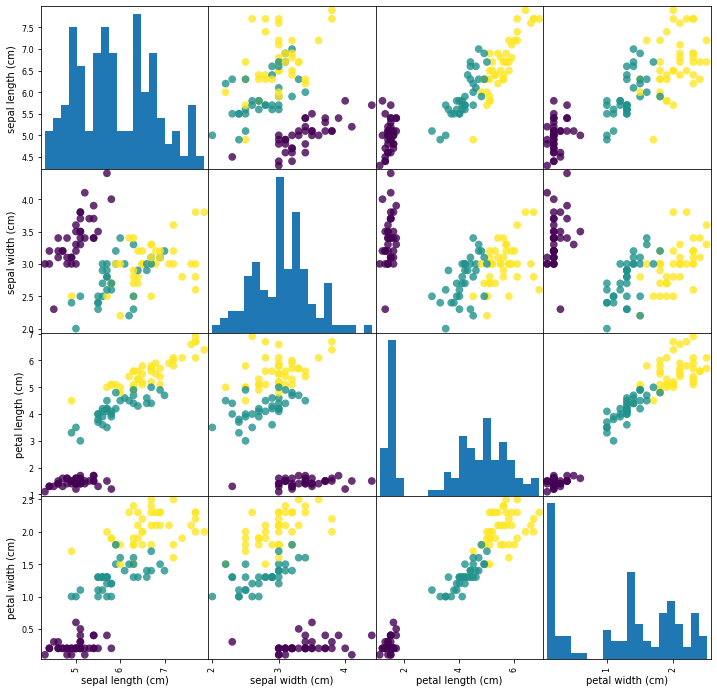

In [17]:
import pandas as pd
# создаем dataframe из данных в массиве X_train
# маркируем столбцы, используя строки в iris_dataset.feature_names
iris_dataframe = pd.DataFrame( X_train, columns = iris_dataset.feature_names )
# создаем матрицу рассеяния из dataframe, цвет точек задаем с помощью y_train
%pylab inline
g = pd.plotting.scatter_matrix(
    iris_dataframe, c = y_train, figsize = (12, 12),
    marker = 'o', hist_kwds = { 'bins' : 20 }, s = 60, alpha = .8
)

## Классификатор kNN — "метод k ближайших соседей"

Построение этой модели заключается лишь в запоминании обучающего набора. Для того, чтобы сделать прогноз для новой точки данных, алгоритм находит точку в обучающем наборе, которая находится ближе всего к новой точке.

![knn-pic](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)


### Создание объекта алгоритма/модели-предсказателя

В `sklearn` все модели машинного обучения реализованы в собственных классах, называемых классами Estimator. Алгоритм классификации на основе метода k ближайших соседей реализован в классификаторе `KNeighborsClassifier` модуля `sklearn.neighbors`. Прежде чем использовать эту модель, нам нужно создать объект-экземпляр класса, указав параметры модели. Самым важным параметром `KNeighborsClassifier` является количество соседей, которые мы установим равным 1.

In [62]:
from  import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors = 1 )

In [16]:
# мне больше нравится не засорять namespace:
import sklearn.neighbors
knn = sklearn.neighbors.KNeighborsClassifier( n_neighbors = 1 )
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Объект `knn` (как и любой объект с ML-моделью в `sklearn`) включает в себя:
* алгоритм, который будет использоваться для построения модели,
* а также алгоритм, который сгенерирует прогнозы для новых точек данных
* информацию, которую алгоритм извлек из обучающих данных (параметры модели);<br> в случае с KNeighborsClassifier он будет просто хранить обучающий набор.

#### Построение модели

In [17]:
# Для построения модели на обучающем наборе, мы вызываем метод fit объекта knn
knn.fit( X_train, y_train )
# Метод fit возвращает сам объект knn (и изменяет его)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Получение прогнозов

Теперь мы можем получить прогнозы, применив эту модель к новым данным, по которым мы еще не знаем правильные метки.

In [18]:
X_new = np.array( [ [5, 2.9, 1, 0.2] ])

prediction = knn.predict( X_new )

print( "Прогноз:", prediction )
print( "Спрогнозированная метка:", iris_dataset['target_names'][prediction] )

Прогноз: [0]
Спрогнозированная метка: ['setosa']


####  Оценка качества модели

Это тот самый момент, когда нам понадобится созданный ранее тестовый набор. Эти данные не использовались для построения модели, но мы знаем правильные сорта для каждого ириса в тестовом наборе.

In [19]:
y_pred = knn.predict( X_test )
print("Прогнозы для тестового набора:", y_pred, sep = '\n')

Прогнозы для тестового набора:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [85]:
print("Правильность на тестовом наборе: {:.2f}".format( np.mean( y_pred == y_test )) )

Правильность на тестовом наборе: 0.97


In [20]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [21]:
# Кроме того, мы можем использовать метод score объекта knn, который вычисляет правильность модели
knn.score( X_test, y_test )

0.9736842105263158

In [22]:
# пример вычисление метрик с использованием sklearn.metrics
import sklearn.metrics

cl1 = [0, 0, 1, 1, 0]
cl2 = [1, 0, 1, 1, 1]

sklearn.metrics.accuracy_score( cl1, cl2 )

0.6

In [23]:
# рекомендуемый способ вычисления метрик
sklearn.metrics.accuracy_score( y_pred, y_test )

0.9736842105263158

### Обобщающая способность, переобучение и недообучение

Построение модели, которая слишком сложна для имеющегося у нас объема информации, называется *переобучением* (*overfitting*). Переобучение происходит, когда ваша модель слишком точно подстраивается под особенности обучающего набора и вы получаете модель, которая хорошо работает на обучающем наборе, но не умеет обобщать результат на новые данные.

Если модель слишком проста и из данных извлечена не вся доступная информация, модель будет плохо работать даже на обучающем наборе. Выбор слишком простой модели называется *недообучением* (*underfitting*).

Переобученность / недообученность для классификации:

![overfit-underfit-class-1](https://s3.amazonaws.com/geekbrains-uploads/geekbrains/public/ckeditor_assets/pictures/4334/content_1-wo81biq10n4jYYHPyWCKNg.png)

![overfit-underfit-class-2](https://cdn-images-1.medium.com/max/1600/1*JZbxrdzabrT33Yl-LrmShw.png)

Переобученность / недообученность для регрессии:

![overfit-underfit-regression-1](http://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png)

![overfit-underfit-regression-2](https://cdn-images-1.medium.com/max/1600/1*_7OPgojau8hkiPUiHoGK_w.png)


Чем сложнее модель, тем лучше она будет работать на обучающих данных. Однако, если наша модель становится слишком сложной, мы начинаем уделять слишком много внимания каждой отдельной точке данных в нашем обучающем наборе, и эта модель не будет хорошо обобщать результат на новые данные.

Существует оптимальная точка, которая позволяет получить наилучшую обобщающую способность. Собственно это и есть модель, которую нам нужно найти.
Компромисс между переобучением и недообучением показан на рисунке.

![fitting-accuracy](https://bitbucket.org/despairr/ds-course-2018/raw/dbbafa803be8b1f01cc078ba3ba96d176b220669/intro-to-ml-images/206.png)

#### Взаимосвязь между сложностью модели и размером набора данных

Чем больше семплов в вашем наборе, тем более сложную модель можно использовать, не беспокоясь о переобучении. Обычно больший объем данных дает большее разнообразие и позволяют строить более сложные модели.

#### kNN и переобучение / недообучение

Набор данных forge:
![forge-dataset](https://bitbucket.org/despairr/ds-course-2018/raw/443959e3b5e41168ceba4adcffbe1e9e9084f246/intro-to-ml-images/219.png)

knn_classification: n_neighbors = 1
![knn_classification: n_neighbors = 1](https://bitbucket.org/despairr/ds-course-2018/raw/443959e3b5e41168ceba4adcffbe1e9e9084f246/intro-to-ml-images/238.png)

knn_classification: n_neighbors = 3
![knn_classification: n_neighbors = 1](https://bitbucket.org/despairr/ds-course-2018/raw/443959e3b5e41168ceba4adcffbe1e9e9084f246/intro-to-ml-images/239.png)

In [24]:
import mglearn

# генерируем набор данных
X, y = mglearn.datasets.make_forge()

# мы разделим наши данные на обучающий и тестовый наборы
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split( X, y, random_state = 0 )

X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape

((26, 2), (19, 2), (7, 2), (26,), (19,), (7,))

In [25]:
# создаём классификатор
import sklearn.neighbors

clf = sklearn.neighbors.KNeighborsClassifier( n_neighbors = 3 )
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [26]:
# подгоняем классификатор, используя обучающий набор
clf.fit( X_train, y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [27]:
# Прогнозы на тестовом наборе
y_pred = clf.predict( X_test )
y_pred

array([1, 0, 1, 0, 1, 0, 0])

In [28]:
# Правильность на тестовом наборе
clf.score( X_test, y_test )

0.8571428571428571

Границы принятия решений, созданные моделью kNN для различных n_neighbors:

![knn_plot_2d_separator](https://bitbucket.org/despairr/ds-course-2018/raw/443959e3b5e41168ceba4adcffbe1e9e9084f246/intro-to-ml-images/244.png)

Использование небольшого числа соседей соответствует высокой сложности модели, а использование большого количества соседей соответствует низкой сложности модели.

In [18]:
import sklearn.datasets

cancer = sklearn.datasets.load_breast_cancer()
cancer['feature_names'], cancer['target_names']

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 array(['malignant', 'benign'], dtype='<U9'))

In [19]:
cancer.data.shape, cancer.data[0]

((569, 30),
 array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]))

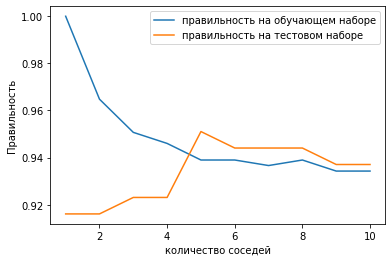

In [23]:
# Построим график "Правильности" для разного числа соседей
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    cancer.data, cancer.target, stratify = cancer.target
)

training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
  # строим модель
  clf = sklearn.neighbors.KNeighborsClassifier( n_neighbors = n_neighbors )
  clf.fit( X_train, y_train )
  # записываем правильность на обучающем наборе
  training_accuracy.append( clf.score(X_train, y_train) )
  # записываем правильность на тестовом наборе
  test_accuracy.append( clf.score(X_test, y_test) )

plt.plot( neighbors_settings, training_accuracy, label="правильность на обучающем наборе" )
plt.plot( neighbors_settings, test_accuracy, label="правильность на тестовом наборе" )
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
g = plt.legend()

## Кросс-валидация (перекрёстная проверка)

*Перекрестная проверка* (*кросс-валидация*) представляет собой статистический метод оценки обобщающей способности, который является более устойчивым и точным, чем разбиение данных на обучающий и тестовый наборы. В перекрестной проверке данные разбиваются несколько раз и строится несколько моделей. Наиболее часто используемый вариант перекрестной проверки – *k-блочная кросс-валидация* (*k-fold cross-validation*), в которой k – это задаваемое пользователем число, как правило, 5 или 10.

![crossval-1](https://bitbucket.org/despairr/ds-course-2018/raw/443959e3b5e41168ceba4adcffbe1e9e9084f246/intro-to-ml-images/927.png)

В scikit-learn перекрестная проверка реализована с помощью функции `sklern.model_selection.cross_val_score`.

In [25]:
# создадим классификатор kNN (n=1)
clf = sklearn.neighbors.KNeighborsClassifier( n_neighbors = 1 )

# получим метрики на кросс-валидации на датасете с раком груди
scores = sklearn.model_selection.cross_val_score( clf, cancer.data, cancer.target, cv = 3 )

scores

array([0.88421053, 0.92631579, 0.9047619 ])

In [27]:
"Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean())

'Средняя правильность перекрестной проверки: 0.91'

In [29]:
# создадим классификатор kNN (n=1)
clf = sklearn.neighbors.KNeighborsClassifier( n_neighbors = 1 )

# получим метрики на кросс-валидации на датасете с ирисами
scores = sklearn.model_selection.cross_val_score( clf, iris_dataset['data'], iris_dataset['target'], cv = 5 )

scores

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [31]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.96


#### Преимущества кросс-валидации

**Равномерное распределение примеров** (тяжёлые / лёгкие, сильно похожие / максимально не похожие):<br>
Обычный train_test_split выполняет случайное разбиение данных. Представьте, нам «повезло», и все трудно классифицируемые примеры в конечном итоге попали в обучающий набор. В этом случае в тестовый набор попадут только «легкие» примеры, и правильность на тестовом наборе будет неправдоподобно высокой. И, наоборот, если нам «не повезло», все трудно классифицируемые примеры попадают в тестовый набор и поэтому мы получаем неправдоподобно низкую правильность. Однако при использовании перекрестной проверки на каждой итерации в тестовый набор, использующийся для проверки модели, попадают разные примеры. Таким образом, модель должна хорошо обобщать все примеры в наборе данных, чтобы все значения правильности (или их среднее) были высокими.

**Чувствительность модели к разным данным**:<br>
Кроме того, наличие нескольких разбиений дает определенную информацию о том, насколько наша модель чувствительна к выбору обучающего набора данных.

**Используем данные более эффективно**:<br>
Используем все 100% и для обучения и для теста.

### Стратифицированная k-блочная кросс-валидация

![crossval-2](https://bitbucket.org/despairr/ds-course-2018/raw/443959e3b5e41168ceba4adcffbe1e9e9084f246/intro-to-ml-images/957.png)

В стратифицированной перекрестной проверке мы разбиваем данные таким образом, чтобы пропорции классов в каждом блоке в точности соответствовали пропорциям классов в наборе данных.


In [35]:
# создадим классификатор kNN (n=1)
clf = sklearn.neighbors.KNeighborsClassifier( n_neighbors = 1 )

# создадим объект для стратифицированной КВ с 5 фолдами
cvgen = sklearn.model_selection.StratifiedKFold(5)

# натравим кросс-валидацию на ирисы
scores = sklearn.model_selection.cross_val_score(
    clf, iris_dataset['data'], iris_dataset['target'], cv = cvgen
)

list(scores), scores.mean()

([0.9666666666666667,
  0.9666666666666667,
  0.9333333333333333,
  0.9333333333333333,
  1.0],
 0.96)

### Кросс-валидация и кастомные метрики

In [36]:
# Generate a random n-class classification problem.
X, y = sklearn.datasets.make_classification( n_classes = 2, random_state = 0 )
X.shape, y.shape

((100, 20), (100,))

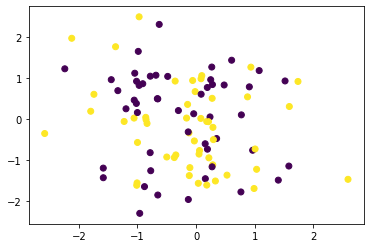

In [51]:
g = matplotlib.pyplot.scatter( X[:,0], X[:,1], c = y )

In [62]:
# A sample toy binary classification dataset
svm = sklearn.svm.LinearSVC( random_state = 0 )

def tp(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[0, 0]
def tn(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[1, 0]
def fn(y_true, y_pred):
    return sklearn.metrics.confusion_matrix(y_true, y_pred)[0, 1]

scoring = {
    'tp' : sklearn.metrics.make_scorer( tp ),
    'tn' : sklearn.metrics.make_scorer( tn ),
    'fp' : sklearn.metrics.make_scorer( fp ),
    'fn' : sklearn.metrics.make_scorer( fn ),
}

cv_results = sklearn.model_selection.cross_validate(
    svm,
    X, y,
    scoring = scoring,
    cv = 3
)

# Getting the test set true positive scores
print( cv_results['test_tp'] )
print( cv_results['test_tn'] )
print( cv_results['test_fp'] )
print( cv_results['test_fn'] )

[12 13 15]
[12 13 15]
[1 3 7]
[5 4 1]


In [63]:
cv_results = sklearn.model_selection.cross_validate(
    svm,
    X, y,
    cv = 3,
    scoring = sklearn.metrics.make_scorer( tp ),
    return_train_score = True
)
cv_results

{'fit_time': array([0.00184798, 0.00086808, 0.00096416]),
 'score_time': array([0.00058293, 0.0004859 , 0.00040984]),
 'test_score': array([12, 13, 15]),
 'train_score': array([32, 33, 34])}

## Бинарная классификация и метрики оценки точности бинарной классификации

В случае бинарной классификации мы говорим о *положительном* (*positive*) классе и *отрицательном* (*negative*) классе, подразумевая под положительным классом интересующий нас класс.

Правильность не является адекватным показателем прогностической способности (примеры с обнаружением рака, вычислением террористов и т.п.).
Т.к. цена ошибки может быть очень разной.

### Типы ошибок бинарной классификации

<img src="https://bitbucket.org/despairr/ds-course-2018/raw/dbbafa803be8b1f01cc078ba3ba96d176b220669/intro-to-ml-images/1062.png" height="200">

Типы ответов:
* *Ложно-положительный* (*false positive*) (*ложное срабатывание*, *ложная тревога*) (*ошибка I рода* (*type I error*)):
  * ошибочно посчитали искомым объектом:
  * тест на рак положительный у здорового больного;
  * сработало подозрение на террориста для мирного гражданина
  * письмо попало в СПАМ
* *Ложно-отрицательный* (*false negative*) (*пропуск события*) (*ошибка II рода* (*type II error*)):
  * ошибочно пропустили искомый объект;
  * тест на рак отрицательный у больного человека;
  * пропустили террориста, посчитав его мирным
  * СПАМ попал во "входящие"
  
В коммерческих проектах обоим видам ошибок можно присвоить определенные стоимости, которые позволяют измерить погрешность конкретного прогноза в денежном выражении, а не с точки зрения правильности.

#### Несбалансированные наборы данных

Пример (помимо предыдущих): прогноз кликов по баннерам на сайтах. Примеров когда пользователь кликнул может быть порядка 1%. "Правильность" 99% (константный прогноз отсутствия клика) тут совершенно не подходит для задачи.

Пример несбалансированного набора данных: поиск "девяток" в датасете "цифры".
Все девятки объявляем положительным классом, а "не девятки" — отрицательным.



In [64]:
# Создаём набор данных "угадай девятки" — у нас только 10% девяток
digits = sklearn.datasets.load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    digits.data, y, random_state = 0
)
y.shape, y[ y == True ].shape, y[ y == True ].shape[0] / y.shape[0]

((1797,), (180,), 0.1001669449081803)

In [66]:
# Классификатор "наиболее частый класс"
import sklearn.dummy

dummy_majority = sklearn.dummy.DummyClassifier( strategy = 'most_frequent' ).fit( X_train, y_train )

pred_most_frequent = dummy_majority.predict( X_test )

print("Уникальные спрогнозированные метки: {}".format( np.unique(pred_most_frequent)) )
print("Правильность на тестовом наборе: {:.2f}".format( dummy_majority.score(X_test, y_test)) )

Уникальные спрогнозированные метки: [False]
Правильность на тестовом наборе: 0.90


In [73]:
# Случайный (dummy) классификатор
dummy = sklearn.dummy.DummyClassifier( strategy = 'stratified' ).fit( X_train, y_train )

pred_dummy = dummy.predict( X_test )

print("Правильность dummy: {:.2f}".format( dummy.score(X_test, y_test)) )

Правильность dummy: 0.83


In [79]:
# Логистическая регрессия
import sklearn.linear_model

logreg = sklearn.linear_model.LogisticRegression(C=0.1, solver = 'liblinear').fit( X_train, y_train )

pred_logreg = logreg.predict( X_test )

print("правильность logreg: {:.2f}".format(logreg.score(X_test, y_test)))

правильность logreg: 0.98


Вывод — "правильность" как единственная метрика не подходитдля оценки бинарного классификатора.

Для несбалансированных наборов данных "правильность" также не является адекватной метрикой, позволяющей количественно оценить прогностическую способность модели.

Объявив «девятку» положительным классом, мы можем рассмотреть элементы матрицы ошибок в терминах ложно положительных (false positive) и ложно отрицательных (false negative) примеров.

<img src="https://bitbucket.org/despairr/ds-course-2018/raw/dbbafa803be8b1f01cc078ba3ba96d176b220669/intro-to-ml-images/1062.png" height="200">

Матрицы ответов модели "Наиболее часто встречающийся класс":
```
[ 403 0 ]
[ 47 0 ]
 ```
Матрицы ответов случайной (dummy) модели:
```
[361 42]
[ 43 4]
```

Матрицы ответов модели логистической регрессии:
```
[401 2]
[ 8 39]
```

Как вычислить *правильность* по такой матрице:

$ Accuracy = \frac{ TP + TN  }{ TP + TN + FP + FN} $

Другими словами, правильность — это количество верно классифицированных примеров (TP и TN), поделенное на общее количество примеров

#### Точность (precision)

$ Precision = \frac{ TP }{ TP + FP } $

Точность показывает, насколько можно доверять классификатору в случае срабатывания.<br>
То есть сколько из предсказанных положительных примеров оказались действительно положительными.

Таким образом, точность – это доля истинно положительных примеров от общего количества предсказанных положительных примеров.

Точность используется в качестве показателя качества модели, когда цель состоит в том, чтобы снизить количество ложно положительных примеров.

Например модель, которая должна спрогнозировать, будет ли эффективен новый лекарственный препарат при лечении болезни. Клинические испытания дороги и провести их лишь в случае высокой уверенности, что препарат действительно работает.

Или нам хочется уменьшить количество СПАМа в inbox-е.

Точность также известна как *прогностическая ценность положительного результата* (*positive predictive value*, *PPV*).




#### Полнота (recall)

$ Recall = \frac{ TP }{ TP + FN } $

*Полнота* (*recall*) показывает, на какой доле истинных объектов алгоритм срабатывает.<br>
Другие названия *полноты*: *чувствительность* (*sensitivity*), *процент
результативный ответов* или *хит-рейт* (*hit rate*) или *доля истинно положительных ответов* (*true positive rate*, *TPR*).

Например, сколько террористов было обнаружено из числа фактических террористов или обнаружено больних СПИДом среди фактически больных.

Полнота используется в качестве показателя качества модели, когда нам необходимо определить все положительные примеры, то есть, когда важно снизить количество ложно отрицательных примеров.

Нужно искать компромисс между оптимизацией полноты и оптимизацией точности. Можно получить идеальную полноту, спрогнозировав все примеры как положительные — не будет
никаких ложно отрицательных и истинно отрицательных примеров.
Однако прогнозирование всех примеров как положительных, приведет к
большому количеству ложно положительных примеров, и, следовательно, точность будет очень низкой.

### Интегральные метрики на основе *точности* и *полноты*

Хотя *точность* и *полнота* являются очень важными метриками, но сами по себе они не дадут вам полной картины.

#### Арифметическое среднее

Единая метрика может быть получена как арифметическое среднее точности и полноты:

$ A = 1/2 \cdot (precision + recall) $

<img src="https://bitbucket.org/despairr/ds-course-2018/raw/443959e3b5e41168ceba4adcffbe1e9e9084f246/other-images/average-precision-recall.png" style="height: 300px">

Пусть есть алгоритм, точность которого равна 10%, а полнота — 100%:
precision = 0:1 recall = 1:
Это может быть случай, когда в выборке всего 10% объектов класса +1, а алгоритм является константным
и всегда возвращает +1. Очевидно, что этот алгоритм плохой, но введенная выше метрика для него равна
A = 0:55.

В свою очередь другой, гораздо более лучший алгоритм, с precision = 0:55 и recall = 55 также
характеризуется A = 0:55.

Ситуация, когда константный и разумный алгоритмы могут лежать на одной линии, является недопусти-
мой, поэтому следует искать другой способ построения единой метрики.

#### Минимум (P,R)

Чтобы констрантный и разумный алгоритмы не лежали на одной линии уровня, можно рассматривать:

$ M = min( precision, recall ) $

<img src="https://bitbucket.org/despairr/ds-course-2018/raw/443959e3b5e41168ceba4adcffbe1e9e9084f246/other-images/min-precision-recall.png" style="height: 300px">

Данный подход решает вышеупомянутую проблему, например:

precision = 0.05; recall = 1 ⇒ M = 0.05<br>

Но есть другой нюанс: два алгоритма, для которых точности одинаковы, но отличаются значения полноты,
будут лежать на одной линии уровня M:

precision = 0.4; recall = 0.5 ⇒ M = 0.4<br>
precision = 0.4; recall = 0.9 ⇒ M = 0.4

Такое тоже недопустимо, так как второй алгоритм существенно лучше первого.

#### F-мера

Одним из способов подытожить их является *F-мера* (*F-measure*), которая представляет собой
гармоническое среднее точности и полноты:

$ F = 2 \cdot \frac{ Accuracy \cdot Racall }{ Accuracy + Racall } $

Если необходимо отдать предпочтение точности или полноте, следует использовать расширенную F-меру, в которой есть параметр $ \beta $:

$ F = (1 + \beta^2) \cdot \frac{ precision \cdot recall }{ \beta^2 \cdot precision + recall } $

![f-measure-samples](https://bitbucket.org/despairr/ds-course-2018/raw/c3f5df9d66d44fe424b4a4f0c0a0195f0ff9b0f7/other-images/f-measure-samples.png)

*f-мера* действительно дает более лучшее представление о качестве модели, чем правильность. Однако, в отличие от *правильности*, ее труднее интерпретировать и объяснить.

In [81]:
import warnings
warnings.filterwarnings('always')

print("дамми:")
print(" правильность: {:.2f}".format( sklearn.metrics.accuracy_score(y_test, pred_dummy ) ))
print(" точность: {:.2f}".format( sklearn.metrics.precision_score( y_test, pred_dummy )) )
print(" полнота: {:.2f}".format( sklearn.metrics.recall_score( y_test, pred_dummy )) )
print(" f1-мера {:.2f}".format( sklearn.metrics.f1_score( y_test, pred_dummy )) )
print()
print("LogisticRegression:")
print(" правильность: {:.2f}".format( sklearn.metrics.accuracy_score(y_test, pred_logreg ) ))
print(" точность: {:.2f}".format( sklearn.metrics.precision_score(y_test, pred_logreg ) ))
print(" полнота: {:.2f}".format( sklearn.metrics.recall_score(y_test, pred_logreg ) ))
print(" f1-мера {:.2f}".format( sklearn.metrics.f1_score(y_test, pred_logreg ) ))


дамми:
 правильность: 0.80
 точность: 0.04
 полнота: 0.04
 f1-мера 0.04

LogisticRegression:
 правильность: 0.98
 точность: 0.95
 полнота: 0.83
 f1-мера 0.89


Если мы хотим получить более развернутый отчет о точности, полноте и f1-мере, можно воспользоваться удобной функцией `classification_report`, чтобы вычислить все три метрики сразу и распечатать их в привлекательном виде:

In [83]:
# classification_report для pred_dummy
print( sklearn.metrics.classification_report(
    y_test, pred_dummy, target_names=["not nine", "nine"]
) )

              precision    recall  f1-score   support

    not nine       0.89      0.89      0.89       403
        nine       0.04      0.04      0.04        47

   micro avg       0.80      0.80      0.80       450
   macro avg       0.47      0.47      0.47       450
weighted avg       0.80      0.80      0.80       450



In [84]:
# classification_report для pred_logreg
print( sklearn.metrics.classification_report(
    y_test, pred_logreg, target_names=["not nine", "nine"]
) )

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



### Оценка принадлежности к классу, значения порога

Многие алгоритмы бинарной классификации устроены следующим образом: сначала вычисляется некоторое вещественное число $ b(x) $, которое сравнивается с порогом $ t $.

$ a(x) = [b(x) > t] $,

где $ b(x) $ — оценка принадлежности "положительному" классу.

Часто бывает необходимо оценить качество именно оценки принадлежности, а порог выбирается позже из соображений на точность или полноту.

![threshold](https://cloudfront.romexsoft.com/wp-content/uploads/2017/07/Shema_forThreshold_RomexColours-1.jpg.webp)

Пусть рассматривается задачного кредитного скоринга и была построена некоторая функция b(x), которая оценивает вероятность возврата кредита клиентом x. Далее классификатор строится следующим образом:

$ a(x) = [b(x) > 0.5] $

При этом получилось, что точность (precision) равна 10%, а полнота (recall) — 70%. Это очень плохой алгоритм, так как 90% клиентов, которым будет выдан кредит, не вернут его.
При этом не понятно, в чем дело: был плохо выбран порог или алгоритм не подходит для решения данной задачи. Именно для этого необходимо измерять качество самих оценок b(x).

![binary-threshold](https://docs.aws.amazon.com/machine-learning/latest/dg/images/mlconcepts_image2.png)

### Кривая точности-полноты (PRC)

*Precision-recall curce*

![PRC-1](https://bitbucket.org/despairr/ds-course-2018/raw/c3f5df9d66d44fe424b4a4f0c0a0195f0ff9b0f7/intro-to-ml-images/1104.png)

![PRC-2](https://bitbucket.org/despairr/ds-course-2018/raw/c3f5df9d66d44fe424b4a4f0c0a0195f0ff9b0f7/intro-to-ml-images/1105.png)

В случае идеального классификатора, то есть если существует такой порог, что и точность, и полнота равны 100%, кривая будет проходить через точку (1; 1). Таким образом, чем ближе кривая пройдет к этой точке, тем лучше оценки. Площадь под этой кривой может быть хорошей мерой качества оценок принадлежности к классу 1. Такая метрика называется *AUC–PRC*, или площадь под PR-кривой.

Требование, выдвигаемое к качеству модели (например, значение полноты должно быть 90%), часто называют  *рабочей точкой* (*operating point*). Фиксирование рабочей точки часто бывает полезно в контексте бизнеса, чтобы гарантировать определенный уровень качества клиентам или другим группам лиц внутри организации.

Как правило, при разработке новой модели нет четкого представления о том, что будет рабочей точкой. По этой причине, а также для того, чтобы получить более полное представление о решаемой задаче, полезно сразу взглянуть на все возможные пороговые значения или все возможные соотношения точности и полноты для этих пороговых значений.

### ROC-кривая

Еще один инструмент, который обычно используется для анализа поведения классификаторов при различных пороговых значениях – это кривая *рабочей характеристики приемника* (*receiver operating characteristics curve*) или кратко *ROC-кривая* (*ROC curve*). Как и *кривая точности-полноты*, *ROC-кривая* позволяет рассмотреть все пороговые значения для данного классификатора, но вместо точности и полноты она показывает *долю ложно положительных примеров* (*false positive rate*, *FPR*) в сравнении с *долей истинно положительных примеров* (*true positive rate*).

$ TPR = \frac{ TP }{ TP + FN } $

$ FPR = \frac{ FP }{ FP + TN } $

*Доля истинно положительных примеров* – это просто еще одно название *полноты*, тогда как *доля ложно положительных примеров* – это доля ложно положительных примеров от
общего количества отрицательных примеров.

ROC-кривая строится строится в осях
* False Positive Rate* (ось X) и *True Positive Rate* (ось Y ), аналогично PR-кривой: постепенно рассматриваются случаи различных значений порогов и отмечаются точки на графике.

![ROC-1](https://bitbucket.org/despairr/ds-course-2018/raw/c3f5df9d66d44fe424b4a4f0c0a0195f0ff9b0f7/intro-to-ml-images/1112.png)

![ROC-1](https://bitbucket.org/despairr/ds-course-2018/raw/c3f5df9d66d44fe424b4a4f0c0a0195f0ff9b0f7/intro-to-ml-images/1113.png)

Кривая стартует с точки (0; 0) и приходит в точку (1; 1). При этом, если существует идеальный классификатор, кривая должна пройти через точку (0; 1). Чем ближе кривая к этой точке, тем лучше будут оценки, а площадь под кривой будет характеризовать качество оценок принадлежности к первому классу. Такая метрика называется *AUC–ROC*,или площадь под ROC-кривой.

В случае идеального алгоритма AUC-ROC = 1, а в случае худшего AUC - ROC = 1/2.
Значение AUC-ROC имеет смысл вероятности того, что если были выбраны случайный положительный и
случайный отрицаельный объекты выборки, положительный объект получит оценку принадлежности выше,
чем отрицательный объект.